# CMSE 830 Final Project (Final Version)
By: Luke Hudak

## Project overview:
### Goal:
The goal of this project is to examine the relationship between government expenditure and citizen health for multiple countries over the span of multiple years. 

### Datasets:
- The dataset containing life expectancy data and other health metrics was found on Kaggle, at the link: https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated
- The dataset containing data on government expenditure was sourced from the World Bank Group, it was sourced via personalized query. Link: https://data.worldbank.org/indicator
- The dataset with healthcare access data was sourced from the World Health Organization via query, at the link: https://data.who.int
- The dataset with water quality data was sourced from WHO/UNICEF Joint Monitoring Programme – JMP, via query at th link: https://washdata.org
- The dataset with additional governemt expenditure metrics was sourced from the World Bank Group, it was sourced via personalized query. Link: https://data.worldbank.org/indicator


## IDA

In [1]:
#import libraries

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

### Loading in datasets

In [2]:
#life exp df
life_exp_df=pd.read_csv("/Users/lukehudak/MSU/FS25/CMSE 830/Final Project/Life-Expectancy-Data-Updated.csv")

#basic government metrics df
gov_metrics_df=pd.read_csv("/Users/lukehudak/MSU/FS25/CMSE 830/Final Project/World_Bank_data.csv")

#healthcare access df
healthcare_access=pd.read_csv("/Users/lukehudak/MSU/FS25/CMSE 830/Final Project/HealthcareAccess.csv")

#water quality df
water_quality=pd.read_csv("/Users/lukehudak/MSU/FS25/CMSE 830/Final Project/WaterQuality.csv")

#gov expenditure df
expenditure=pd.read_csv("/Users/lukehudak/MSU/FS25/CMSE 830/Final Project/Add_Gov_Expenditure.csv")

### Cleaning

In [3]:
#life exp df cleaning

# remove unwated cols
life_exp_df=life_exp_df.drop([
    'GDP_per_capita',
    'Population_mln', 
    'Thinness_ten_nineteen_years',
    'Thinness_five_nine_years', 
    'Schooling', 
    'Economy_status_Developed',
    'Economy_status_Developing'],
    axis=1,
    errors='ignore')

#rename cols
life_exp_df.columns=['country',
                     'region',
                     'year',
                     'infant_deaths',
                     "under_five_deaths",
                     "adult_mortality",
                     "alcohol_consumption",
                     "hepatitis_b",
                     "measles",
                     "bmi",
                     "polio",
                     "diphtheria",
                     "incidents_hiv",
                     "life_expectancy"
]

life_exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              2864 non-null   object 
 1   region               2864 non-null   object 
 2   year                 2864 non-null   int64  
 3   infant_deaths        2864 non-null   float64
 4   under_five_deaths    2864 non-null   float64
 5   adult_mortality      2864 non-null   float64
 6   alcohol_consumption  2864 non-null   float64
 7   hepatitis_b          2864 non-null   int64  
 8   measles              2864 non-null   int64  
 9   bmi                  2864 non-null   float64
 10  polio                2864 non-null   int64  
 11  diphtheria           2864 non-null   int64  
 12  incidents_hiv        2864 non-null   float64
 13  life_expectancy      2864 non-null   float64
dtypes: float64(7), int64(5), object(2)
memory usage: 313.4+ KB


In [4]:
#gov metrics cleaning

#drop time code
gov_metrics_df=gov_metrics_df.drop(["Time Code",
                                    "Domestic general government health expenditure (% of GDP) [SH.XPD.GHED.GD.ZS]"], #dropping health exp now because new dataset has more expansive amount of observations
                                    axis=1,
                                    errors="ignore") 

#drop last 5 rows(contains unwanted text)
gov_metrics_df=gov_metrics_df.drop(gov_metrics_df.tail(5).index)

#replace missing vals with na vals
gov_metrics_df.replace("..", np.nan, inplace=True)

#rename cols

gov_metrics_df.columns=["year",
                        "country",
                        "country_Code",
                        "education_expenditure_pct_gdp",
                        "rnd_expenditure_pct_gdp",
                        "gdp_per_capita",
                        "population"]

#convert data types
gov_metrics_df=gov_metrics_df.astype({
    "year": "int",
    "education_expenditure_pct_gdp": "float",
    "rnd_expenditure_pct_gdp":"float",
    "gdp_per_capita":"float"
})

gov_metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5425 entries, 0 to 5424
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           5425 non-null   int64  
 1   country                        5425 non-null   object 
 2   country_Code                   5425 non-null   object 
 3   education_expenditure_pct_gdp  3354 non-null   float64
 4   rnd_expenditure_pct_gdp        2110 non-null   float64
 5   gdp_per_capita                 5119 non-null   float64
 6   population                     5425 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 296.8+ KB


In [5]:
#health care access cleaning

#drop cols
healthcare_access=healthcare_access.drop([
    'Year Code',
    'Country Code'],
    axis=1,
    errors='ignore')

#replace filler with nan
healthcare_access.replace("..", np.nan, inplace=True)

#drop last few rows
healthcare_access_df = healthcare_access.drop(healthcare_access.tail(5).index)

#rename cols
healthcare_access_df.columns=['year',
                           'country',
                           'physicians_per_1000',
                           'nurses_and_midwives_per_1000',
                           'hospital_beds_per_1000',
                           'community_health_workers_per_1000',
                           'specialist_surgical_workforce_per_1000']

#convert data types
healthcare_access_df=healthcare_access_df.astype({
    "year": "int",
    "physicians_per_1000": "float",
    "nurses_and_midwives_per_1000":"float",
    "hospital_beds_per_1000":"float",
    "community_health_workers_per_1000":"float",
    "specialist_surgical_workforce_per_1000":"float"
})

healthcare_access_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5425 entries, 0 to 5424
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   year                                    5425 non-null   int64  
 1   country                                 5425 non-null   object 
 2   physicians_per_1000                     2636 non-null   float64
 3   nurses_and_midwives_per_1000            2613 non-null   float64
 4   hospital_beds_per_1000                  2951 non-null   float64
 5   community_health_workers_per_1000       162 non-null    float64
 6   specialist_surgical_workforce_per_1000  295 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 296.8+ KB


In [6]:
# water quality cleaning

#drop cols
water_quality=water_quality.drop([
    'Time Code',
    'Country Code'],
    axis=1, errors='ignore')

#replace filler with nan
water_quality.replace("..", np.nan, inplace=True)

#drop last few rows
water_quality_df = water_quality.drop(water_quality.tail(5).index)

#rename cols
water_quality_df.columns=['year',
                       'country',
                       'access_to_safe_water_pct_pop',
                       'mortality_rate_of_unsafe_water_per_100000']

#convert data types
water_quality_df=water_quality_df.astype({
    "year": "int",
    "access_to_safe_water_pct_pop": "float",
    "mortality_rate_of_unsafe_water_per_100000":"float",
})
water_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   year                                       6650 non-null   int64  
 1   country                                    6650 non-null   object 
 2   access_to_safe_water_pct_pop               3764 non-null   float64
 3   mortality_rate_of_unsafe_water_per_100000  231 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 207.9+ KB


In [7]:
#gov expenditure cleaning

#drop cols

expenditure=expenditure.drop(['Time Code',
                              'Country Code',],
                              axis=1,
                              errors='ignore')

#replace filler with nan
expenditure.replace("..", np.nan, inplace=True)

#drop last few rows
expenditure_df = expenditure.drop(expenditure.tail(5).index)

#rename
expenditure_df.columns=['year',
                     'country',
                     'gen_gov_health_expenditure_pct_gdp',
                     'gen_gov_health_expenditure_pct_current_health_exp',
                     'gen_gov_health_expenditure_pct_gov_exp',
                     'gen_gov_final_consumption_expenditure_pct_gdp']

#convert data types
expenditure_df=expenditure_df.astype({
    "year": "int",
    "gen_gov_health_expenditure_pct_gdp": "float",
    "gen_gov_health_expenditure_pct_current_health_exp":"float",
    "gen_gov_health_expenditure_pct_gov_exp":"float",
    "gen_gov_final_consumption_expenditure_pct_gdp":"float",
})

expenditure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   year                                               6650 non-null   int64  
 1   country                                            6650 non-null   object 
 2   gen_gov_health_expenditure_pct_gdp                 5450 non-null   float64
 3   gen_gov_health_expenditure_pct_current_health_exp  5450 non-null   float64
 4   gen_gov_health_expenditure_pct_gov_exp             4766 non-null   float64
 5   gen_gov_final_consumption_expenditure_pct_gdp      5260 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 311.8+ KB


### Summary Statistics

In [8]:
df_list=[life_exp_df,gov_metrics_df,healthcare_access_df,water_quality_df,expenditure_df]

for i in df_list:
    print(i.describe())

              year  infant_deaths  under_five_deaths  adult_mortality  \
count  2864.000000    2864.000000        2864.000000      2864.000000   
mean   2007.500000      30.363792          42.938268       192.251775   
std       4.610577      27.538117          44.569974       114.910281   
min    2000.000000       1.800000           2.300000        49.384000   
25%    2003.750000       8.100000           9.675000       106.910250   
50%    2007.500000      19.600000          23.100000       163.841500   
75%    2011.250000      47.350000          66.000000       246.791375   
max    2015.000000     138.100000         224.900000       719.360500   

       alcohol_consumption  hepatitis_b      measles          bmi  \
count          2864.000000  2864.000000  2864.000000  2864.000000   
mean              4.820882    84.292598    77.344972    25.032926   
std               3.981949    15.995511    18.659693     2.193905   
min               0.000000    12.000000    10.000000    19.800000 

## Creating Merged Dataframe

In [9]:
#will merge using life exp df as main df 
#outer merge other 4 dfs into one to keep as much info as possible

#gov metrics and healthcare access merge
gov_metrics_and_healthcare=pd.merge(
    gov_metrics_df,
    healthcare_access_df,
    how="outer",
    on=["country","year"])

gov_metrics_and_healthcare_and_water=pd.merge(
    gov_metrics_and_healthcare,
    water_quality_df,
    how="outer",
    on=["country","year"])

predictor_df=pd.merge(
    gov_metrics_and_healthcare_and_water,
    expenditure_df,
    how="outer",
    on=["country","year"])

#finally left merge on life exp df to get final merged df
merged_df=pd.merge(
    life_exp_df,
    predictor_df,
    how="left",
    on=["country","year"])

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 30 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   country                                            2864 non-null   object 
 1   region                                             2864 non-null   object 
 2   year                                               2864 non-null   int64  
 3   infant_deaths                                      2864 non-null   float64
 4   under_five_deaths                                  2864 non-null   float64
 5   adult_mortality                                    2864 non-null   float64
 6   alcohol_consumption                                2864 non-null   float64
 7   hepatitis_b                                        2864 non-null   int64  
 8   measles                                            2864 non-null   int64  
 9   bmi     

In [10]:
#calculate percentage of missing values for each variable
missing_proportion=merged_df.isna().mean()
missing_proportion*100

country                                                0.000000
region                                                 0.000000
year                                                   0.000000
infant_deaths                                          0.000000
under_five_deaths                                      0.000000
adult_mortality                                        0.000000
alcohol_consumption                                    0.000000
hepatitis_b                                            0.000000
measles                                                0.000000
bmi                                                    0.000000
polio                                                  0.000000
diphtheria                                             0.000000
incidents_hiv                                          0.000000
life_expectancy                                        0.000000
country_Code                                           1.117318
education_expenditure_pct_gdp           

In [11]:
#drop cols with a lot of missing values
merged_df=merged_df.drop([
    'community_health_workers_per_1000',
    'specialist_surgical_workforce_per_1000',
    'mortality_rate_of_unsafe_water_per_100000',
    'country_Code'], #drop country code, forgot to do that earlier
    axis=1, errors='ignore')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 26 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   country                                            2864 non-null   object 
 1   region                                             2864 non-null   object 
 2   year                                               2864 non-null   int64  
 3   infant_deaths                                      2864 non-null   float64
 4   under_five_deaths                                  2864 non-null   float64
 5   adult_mortality                                    2864 non-null   float64
 6   alcohol_consumption                                2864 non-null   float64
 7   hepatitis_b                                        2864 non-null   int64  
 8   measles                                            2864 non-null   int64  
 9   bmi     

### Preliminary EDA (just basics)

Perform some basic EDA to help get better understanding of data and best way to address missingness

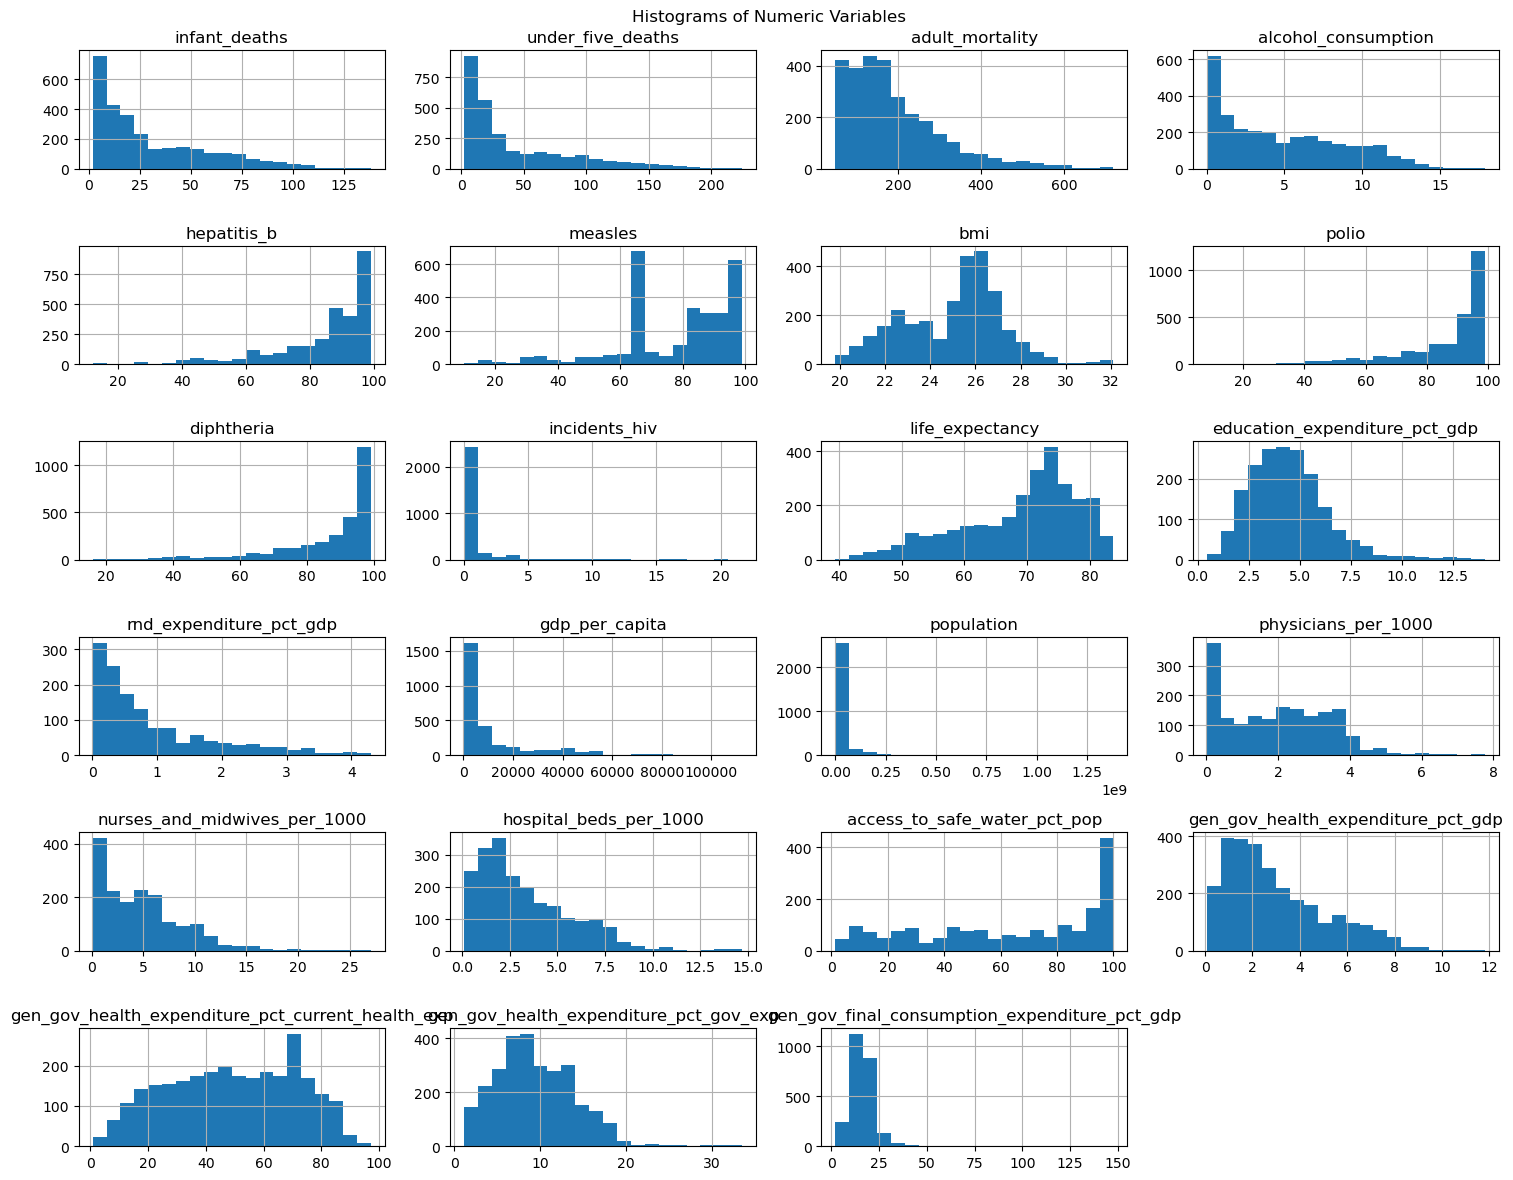

In [12]:
#plot histograms of numeric vals

#numeric cols
numeric_cols = [
    'infant_deaths',
    'under_five_deaths',
    'adult_mortality',
    'alcohol_consumption',
    'hepatitis_b',
    'measles',
    'bmi',
    'polio',
    'diphtheria',
    'incidents_hiv',
    'life_expectancy',
    'education_expenditure_pct_gdp',
    'rnd_expenditure_pct_gdp',
    'gdp_per_capita',
    'population',
    'physicians_per_1000',
    'nurses_and_midwives_per_1000',
    'hospital_beds_per_1000',
    'access_to_safe_water_pct_pop',
    'gen_gov_health_expenditure_pct_gdp',
    'gen_gov_health_expenditure_pct_current_health_exp',
    'gen_gov_health_expenditure_pct_gov_exp',
    'gen_gov_final_consumption_expenditure_pct_gdp'
]


# histograms
merged_df[numeric_cols].hist(bins=20, figsize=(15,12), layout=(6,4))
plt.suptitle("Histograms of Numeric Variables", fontsize=12)
plt.tight_layout()
plt.show()

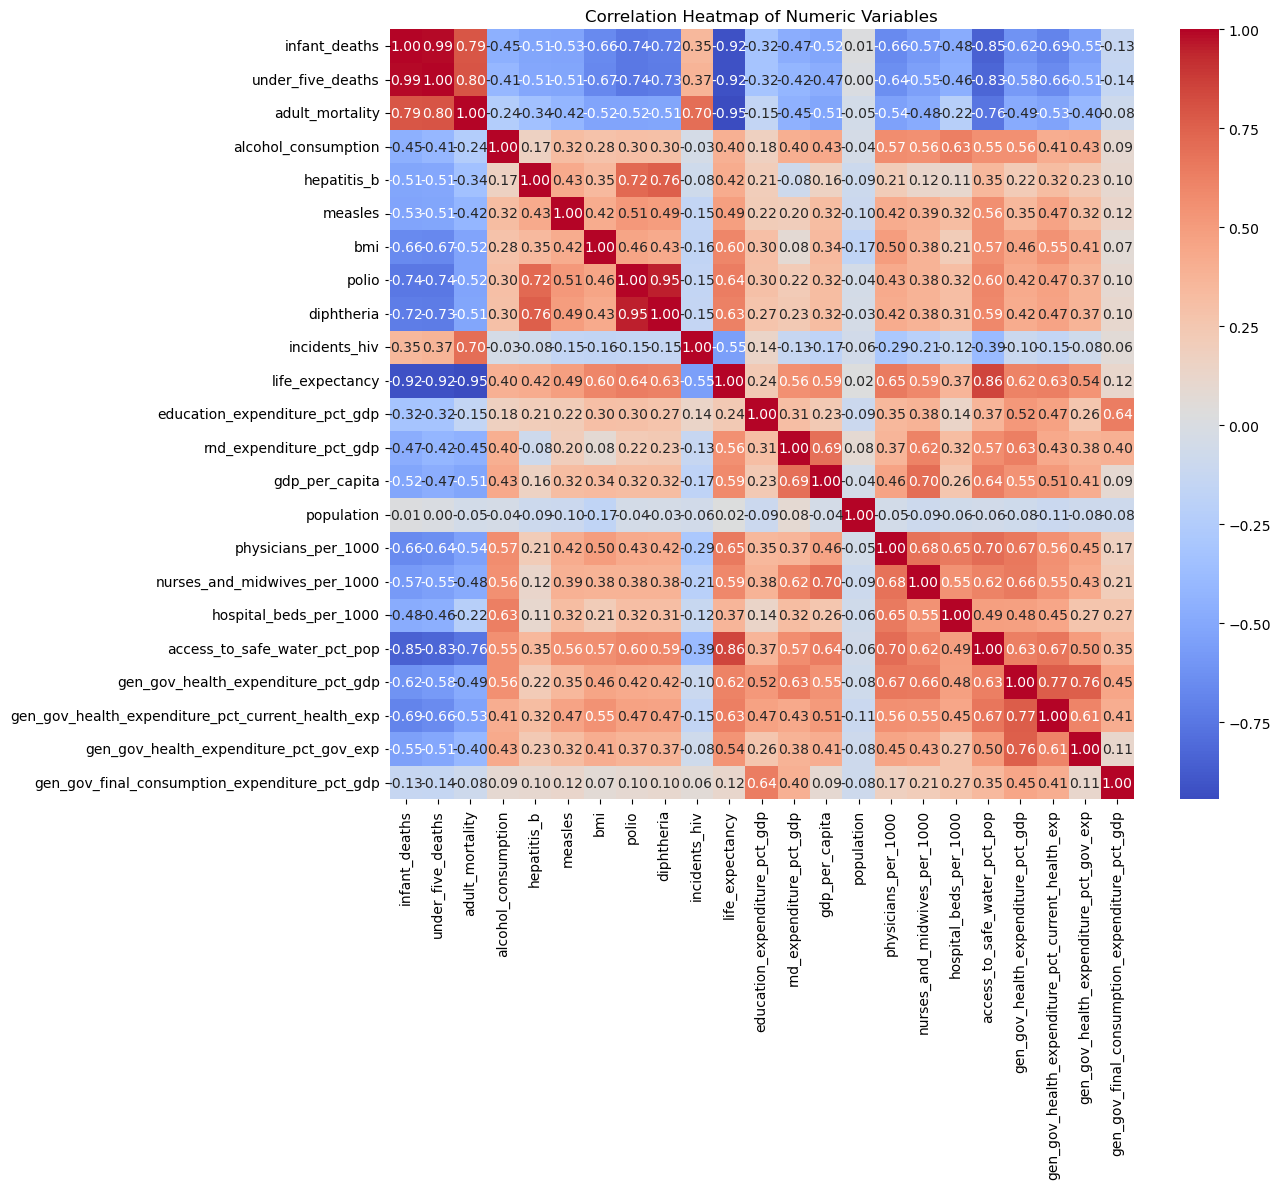

In [13]:
#correlation heatmap
plt.figure(figsize=(12,10))
corr = merged_df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

## Missingness

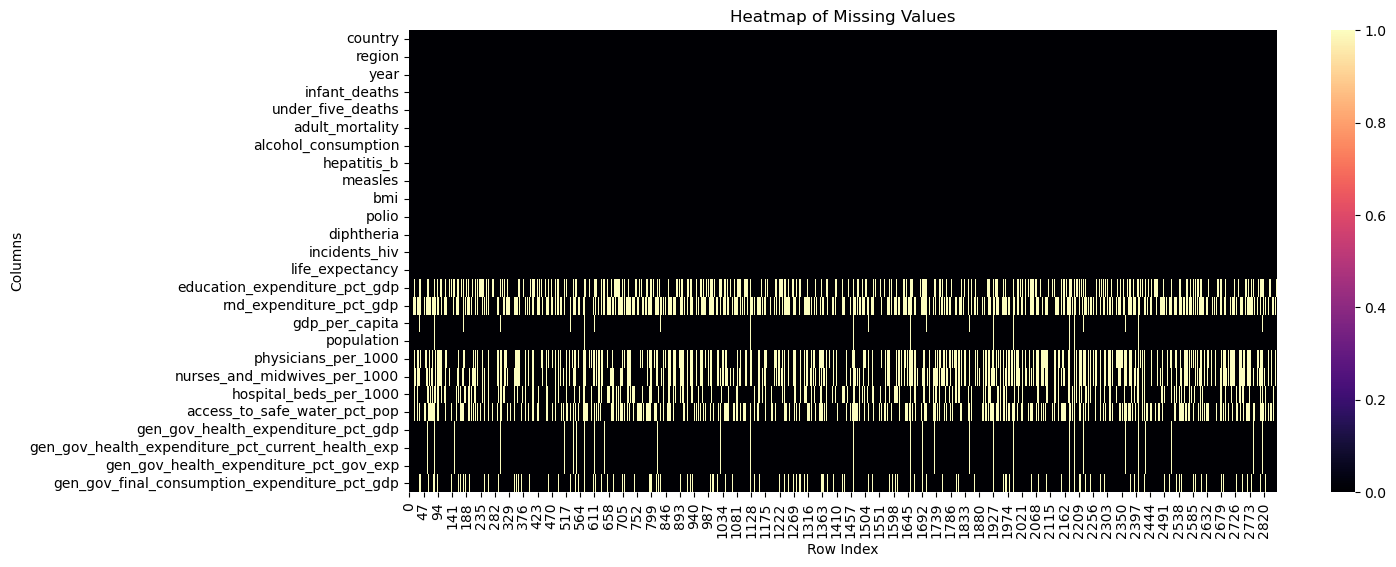

In [14]:
#heatmap to visualize missingness

plt.figure(figsize=(14, 6))
sns.heatmap(merged_df.isna().T, cmap="magma")
plt.title("Heatmap of Missing Values")
plt.xlabel("Row Index")
plt.ylabel("Columns")
plt.show()

## Imputation

MICE will be used to impute data for the eniter dataframe due to the amount of missingness I have, I have quite a few correlated variables in this dataset, and i want to preserve any linear realtionships. 

### Scaling

Because my variable are on different scales (pct gdp, per x people, etc.) I will scale my data before imputataion (in preparation for MICE), then descale to get a full df with no missingness in the original units. 

In [15]:
#numeric cols
numeric_cols = [
    'infant_deaths',
    'under_five_deaths',
    'adult_mortality',
    'alcohol_consumption',
    'hepatitis_b',
    'measles',
    'bmi',
    'polio',
    'diphtheria',
    'incidents_hiv',
    'life_expectancy',
    'education_expenditure_pct_gdp',
    'rnd_expenditure_pct_gdp',
    'gdp_per_capita',
    'population',
    'physicians_per_1000',
    'nurses_and_midwives_per_1000',
    'hospital_beds_per_1000',
    'access_to_safe_water_pct_pop',
    'gen_gov_health_expenditure_pct_gdp',
    'gen_gov_health_expenditure_pct_current_health_exp',
    'gen_gov_health_expenditure_pct_gov_exp',
    'gen_gov_final_consumption_expenditure_pct_gdp']



In [16]:
#the imputation section was done with the help of Chat GPT version GPT-5

#temp scaler before imputation

df = merged_df.copy()

from sklearn.preprocessing import StandardScaler
scaler_impute = StandardScaler()

scaled_numeric = scaler_impute.fit_transform(df[numeric_cols])
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_cols, index=df.index)


In [17]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(
    random_state=42,
    max_iter=20,
    sample_posterior=True #add noise
)

imputed_scaled = imputer.fit_transform(scaled_numeric_df)
imputed_scaled_df = pd.DataFrame(imputed_scaled, columns=numeric_cols, index=df.index)


In [18]:
imputed_unscaled = scaler_impute.inverse_transform(imputed_scaled_df)

imputed_unscaled_df = pd.DataFrame(
    imputed_unscaled,
    columns=numeric_cols,
    index=df.index
)

# Make your imputed dataset
imputed_df = df.copy()
imputed_df[numeric_cols] = imputed_unscaled_df


### Clipping
MICE imputation results in negative values, in this case negative values are largely unrealistics, and so are percents over 100, therefore I will clip the values accordingly

In [19]:
# clip all cols at 0
for col in numeric_cols:
    imputed_df[col] = imputed_df[col].clip(lower=0)

#clip percents at 100
percent_cols = [
    'gen_gov_health_expenditure_pct_gdp',
    'gen_gov_health_expenditure_pct_current_health_exp',
    'gen_gov_health_expenditure_pct_gov_exp',
    'education_expenditure_pct_gdp',
    'rnd_expenditure_pct_gdp',
    'access_to_safe_water_pct_pop'
]

for col in percent_cols:
    imputed_df[col] = imputed_df[col].clip(lower=0, upper=100)


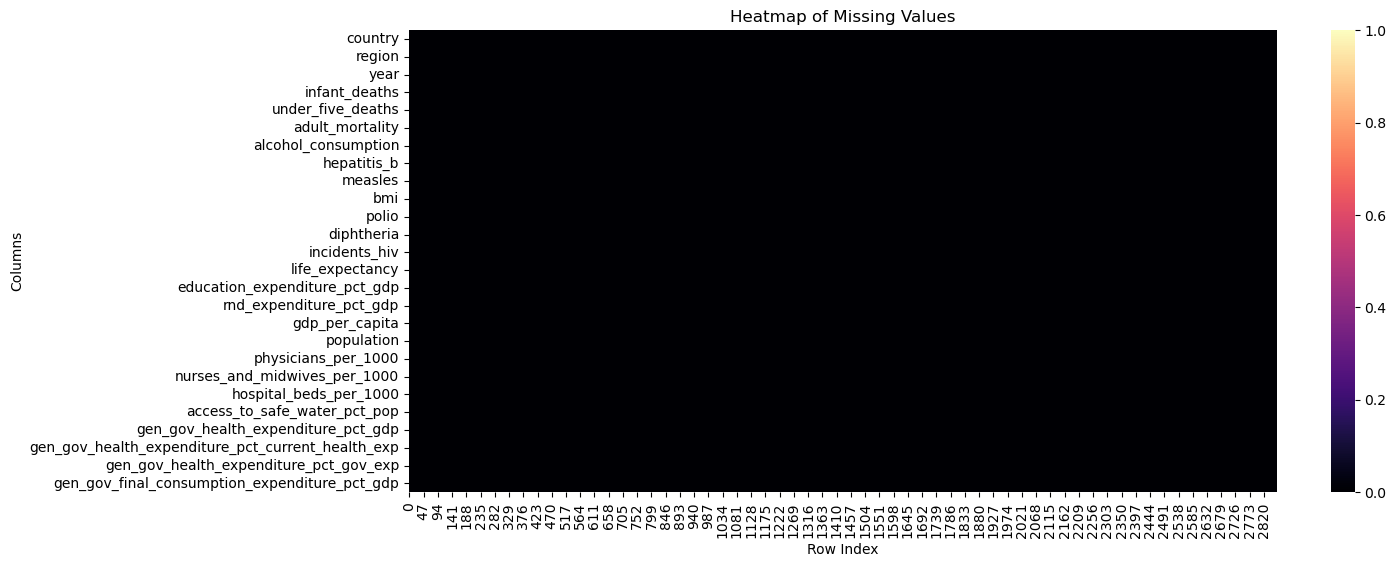

In [20]:
#heatmap showing imputation results
 
plt.figure(figsize=(14, 6))
sns.heatmap(imputed_df.isna().T,
            cmap="magma",
            vmin=0,
            vmax=1)
plt.title("Heatmap of Missing Values")
plt.xlabel("Row Index")
plt.ylabel("Columns")
plt.show()

## Encoding

Region is one-hot encoded in preparation for modeling and analysis

In [21]:
#modify code from HW2
from sklearn.preprocessing import OneHotEncoder
# Copy dataframe
imputed_encoded_df = imputed_df.copy()

# fill missing vals in region
imputed_encoded_df['region_filled'] = imputed_encoded_df['region'].fillna('Unknown')

#one hot encoding
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
region_encoded = onehot.fit_transform(imputed_encoded_df[['region_filled']])
region_names = onehot.categories_[0] #get col names
region_encoded_df = pd.DataFrame(region_encoded, columns=region_names, index=imputed_encoded_df.index) # create df 
imputed_encoded_df = pd.concat([imputed_encoded_df, region_encoded_df], axis=1) # add encoded df to original
imputed_encoded_df.drop(columns=['region_filled'], inplace=True) # drop region filled col

# check
imputed_encoded_df.head()

country          region  year  infant_deaths  under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   adult_mortality  alcohol_consumption  hepatitis_b  measles   bmi  ...  \
0         105.8240                 1.32         97.0     65.0  27.8  ...   
1          57.9025                10.35         97.0     94.0  26.0  ...   
2         201.0765                 1.57         60.0     35.0  21.2  ...   
3         222.1965                 5.68         93.0     74.0  25.3  ...   
4          57.9510                 2.89         97.0     89.0  27.0  ...   

   gen_gov_final_consumption_expenditure_pct_gdp  Africa  Asia  \
0                                      13.805172     0.0   0.0   
1                                      19.355595     0.0   0.0   
2                                       9.862116     0.0   1.0   
3                                      23.057129     0.0   0.0   
4                                      22.003839     0.0   0.0   

   Central America and Caribbean  European Union  Middle East  North America  \
0                            0.0             0.0          1.0            0.0   
1                            0.0             1.0          0.0            0.0   
2                            0.0             0.0          0.0            0.0   
3                            0.0             0.0          0.0            0.0   
4                            0.0             0.0          1.0            0.0   

   Oceania  Rest of Europe  South America  
0      0.0             0.0            0.0  
1      0.0             0.0            0.0  
2      0.0             0.0            0.0  
3      0.0             0.0            1.0  
4      0.0             0.0            0.0  

[5 rows x 35 columns]

## EDA (full EDA with imputed data)

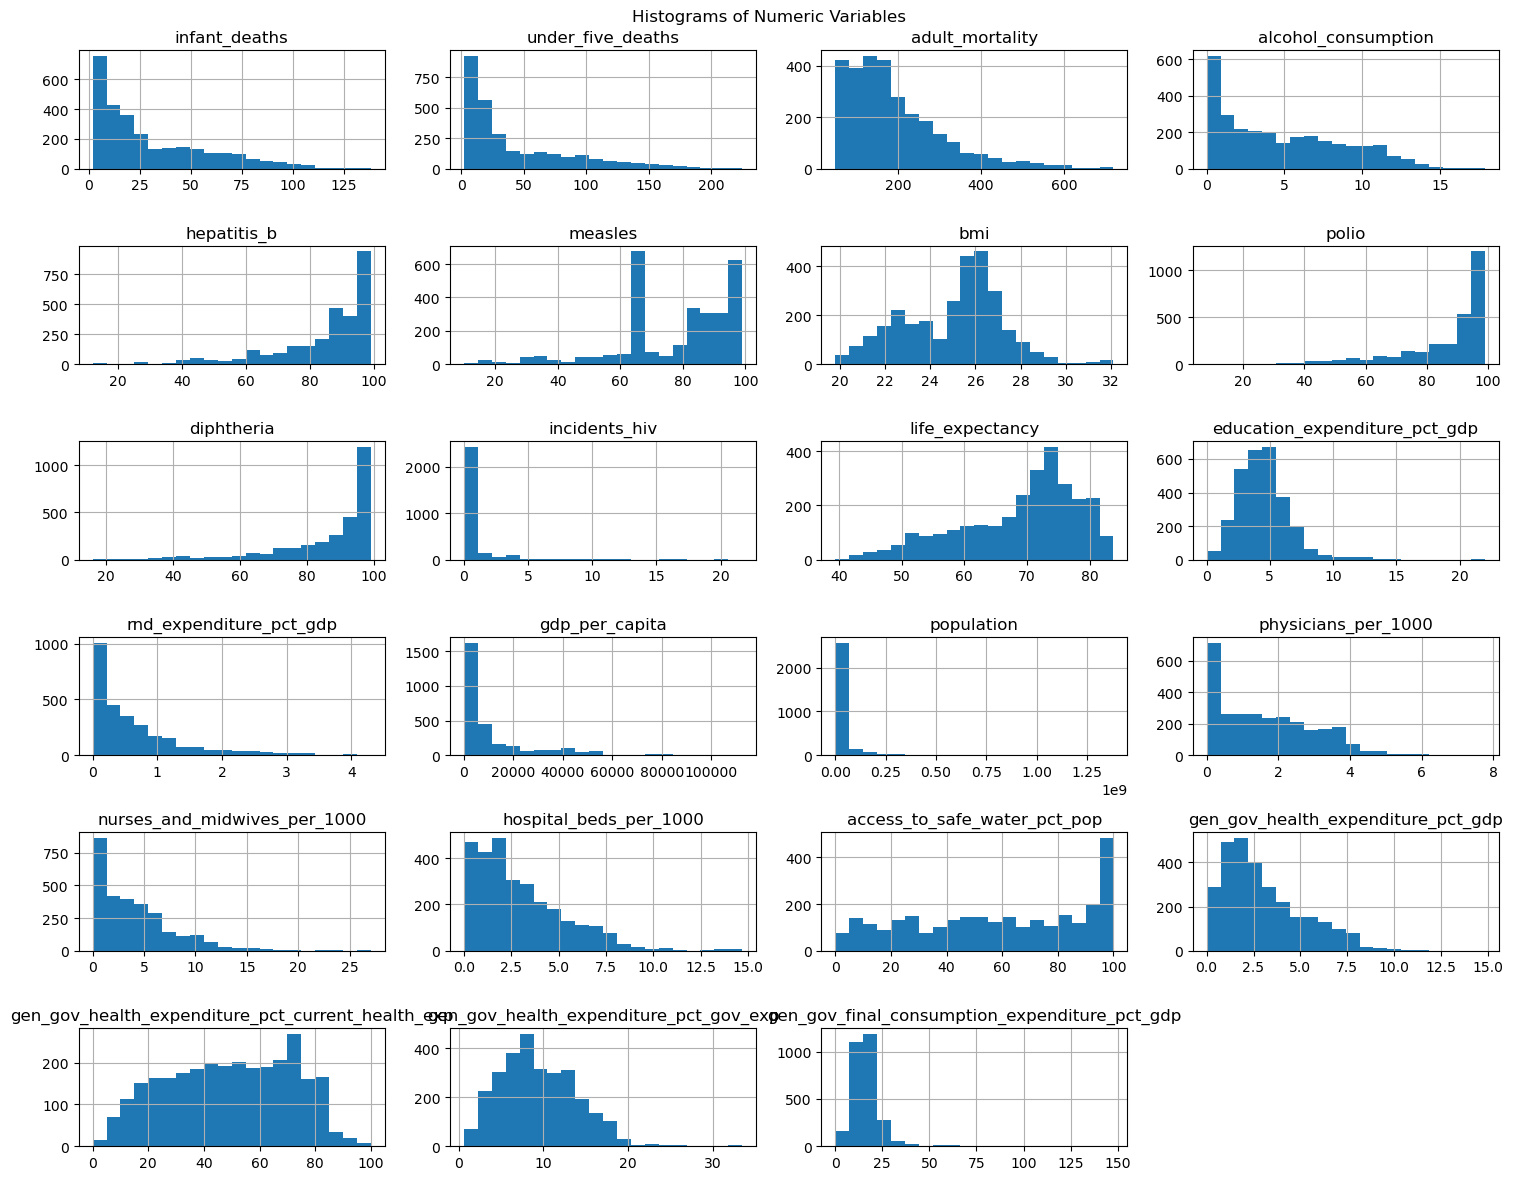

In [22]:
#histograms to show distribution of data

imputed_df[numeric_cols].hist(bins=20, figsize=(15,12), layout=(6,4))
plt.suptitle("Histograms of Numeric Variables", fontsize=12)
plt.tight_layout()
plt.show()

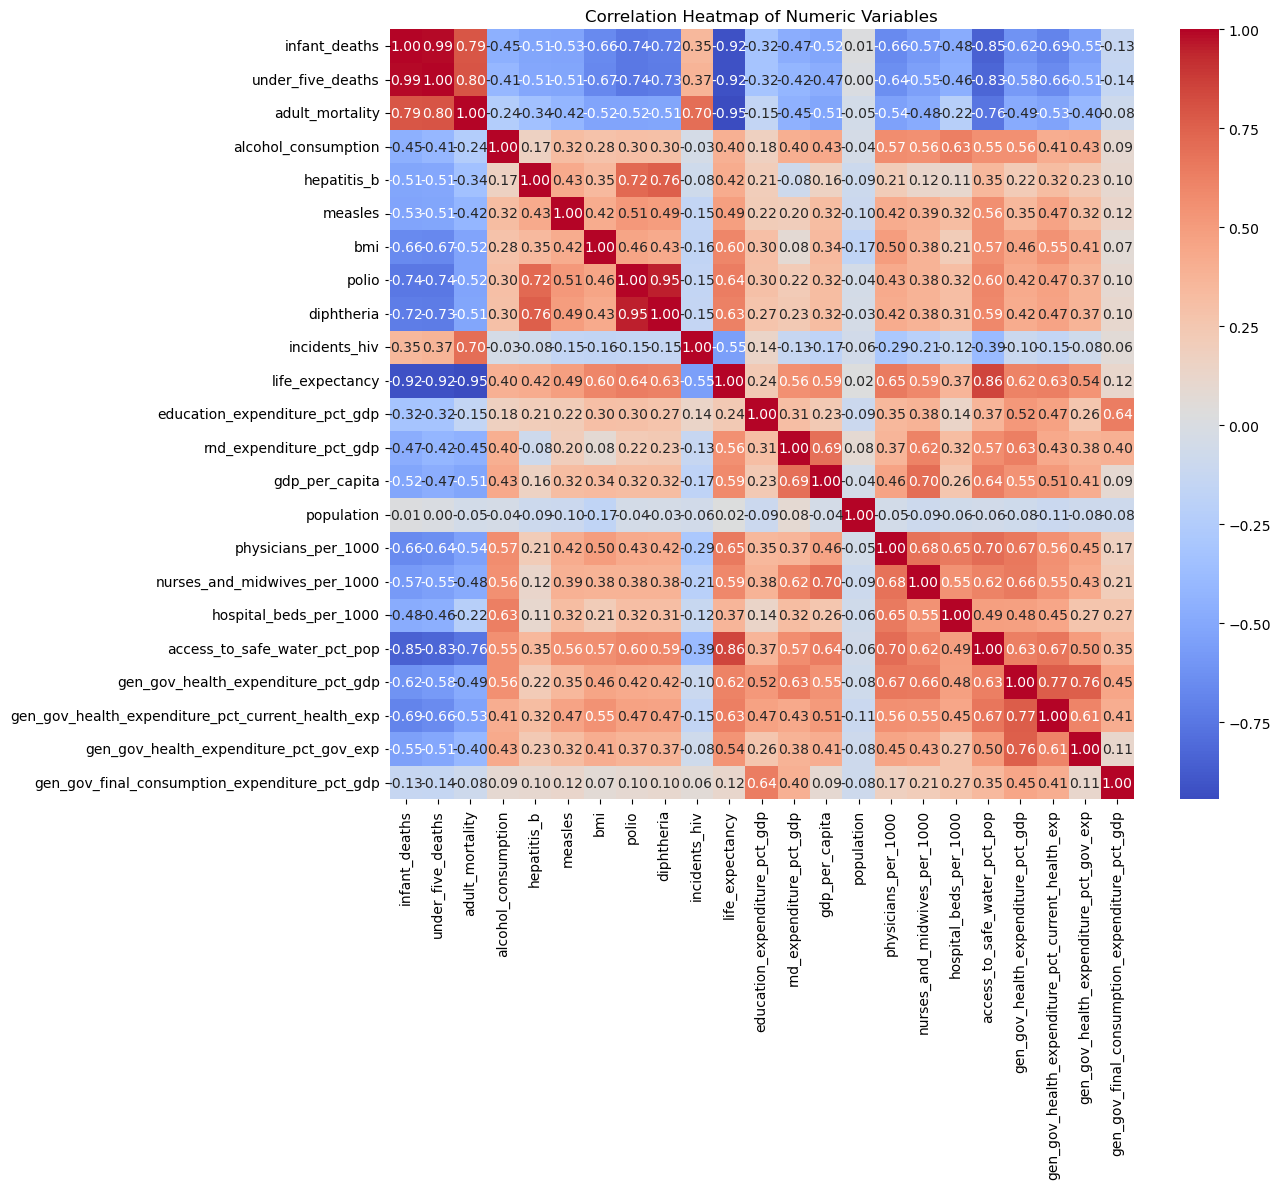

In [23]:
#correlation heatmap
plt.figure(figsize=(12,10))
corr = merged_df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

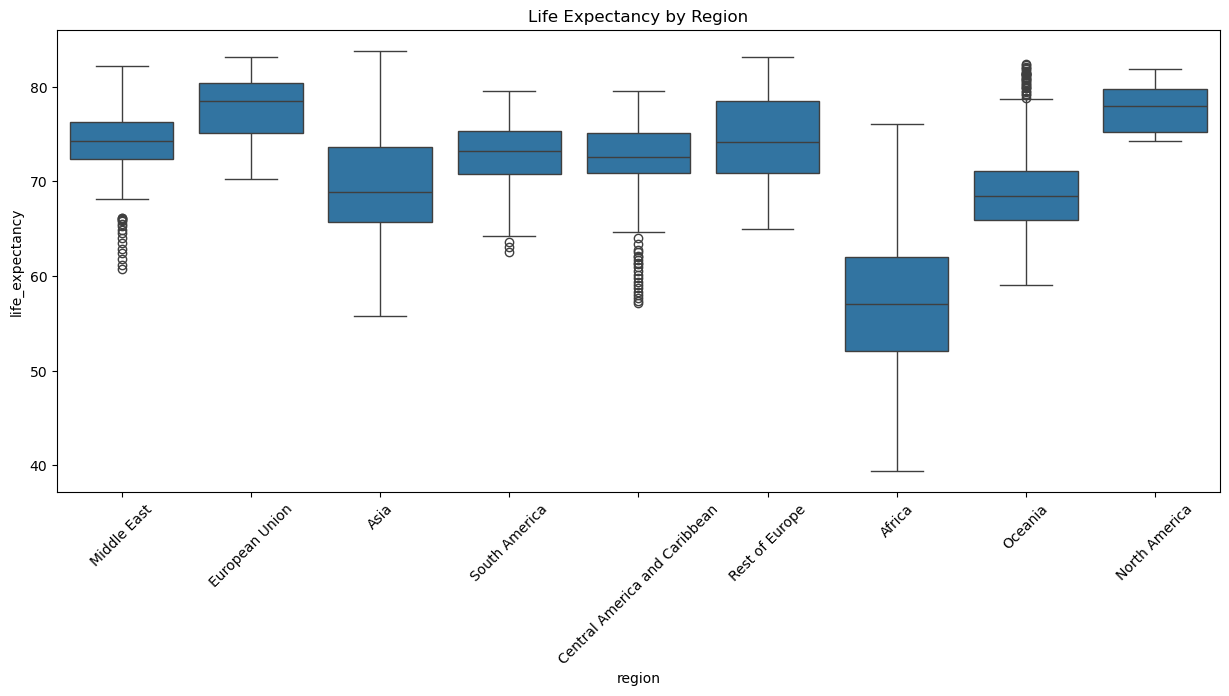

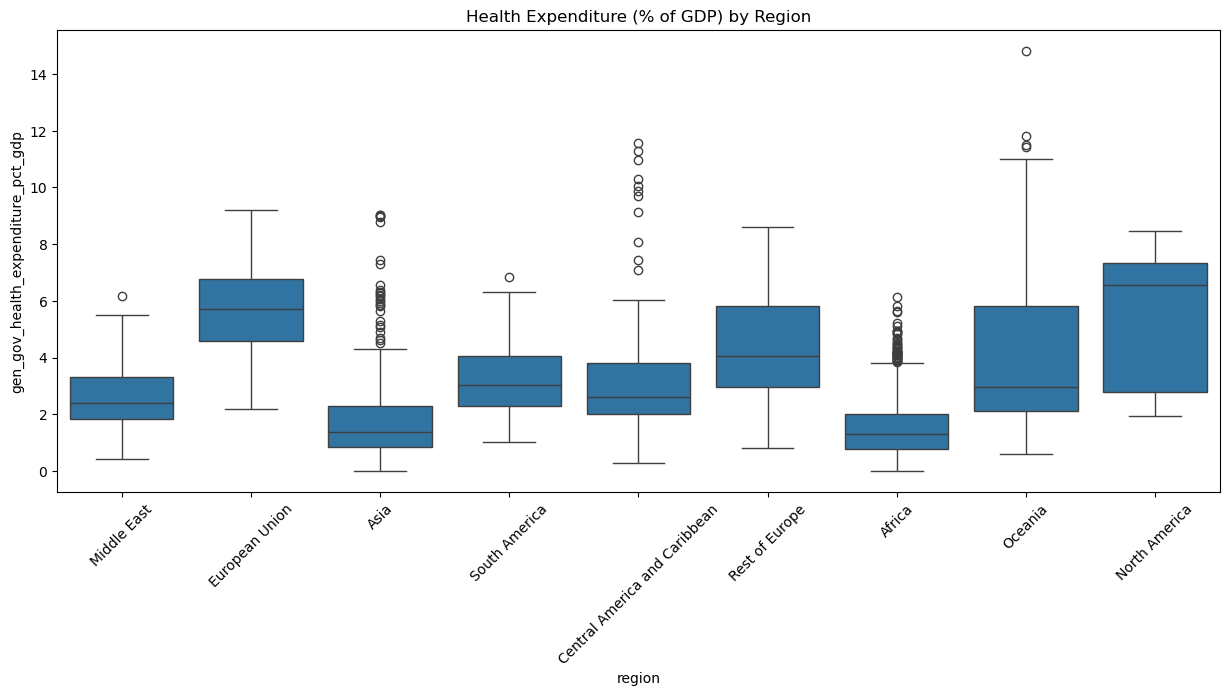

In [24]:
#boxplots to show distributions by regions
plt.figure(figsize=(15,6))
sns.boxplot(x='region', y='life_expectancy', data=imputed_df)
plt.xticks(rotation=45)
plt.title("Life Expectancy by Region")
plt.show()

plt.figure(figsize=(15,6))
sns.boxplot(x='region', y='gen_gov_health_expenditure_pct_gdp', data=imputed_df)
plt.xticks(rotation=45)
plt.title("Health Expenditure (% of GDP) by Region")
plt.show()

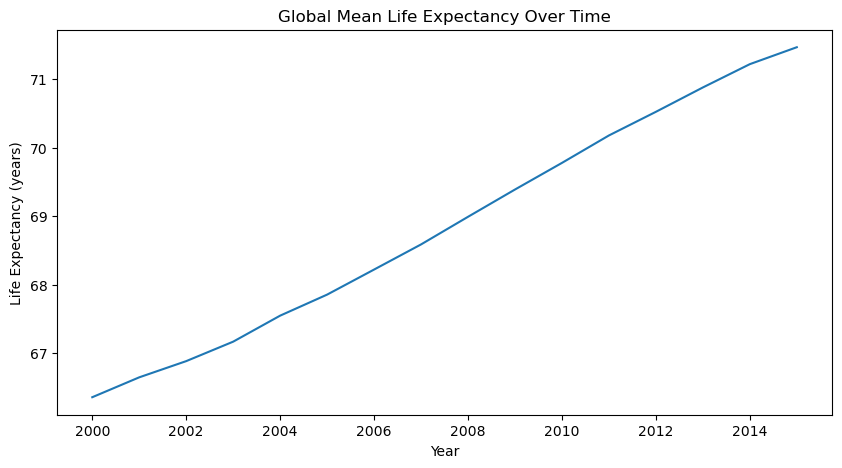

In [25]:
#global life expectancy
imputed_encoded_df.groupby("year")["life_expectancy"].mean().plot(figsize=(10,5))
plt.title("Global Mean Life Expectancy Over Time")
plt.ylabel("Life Expectancy (years)")
plt.xlabel("Year")
plt.show()


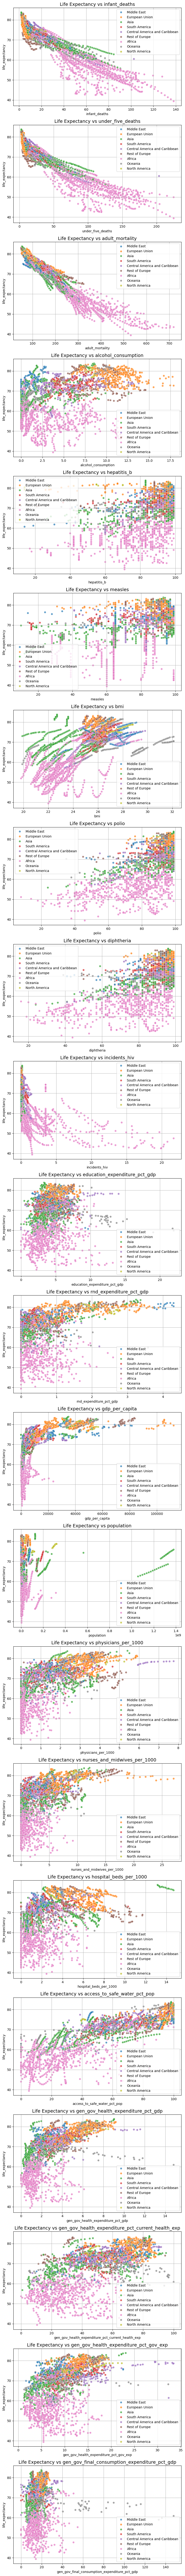

In [26]:
# Select numeric columns in imputed_df, excluding 'life_expectancy'
x_vars = [col for col in numeric_cols if col != 'life_expectancy' and col!= "year"]

# Set up the figure: one subplot per numeric variable
fig, axes = plt.subplots(len(x_vars), 1, figsize=(8, 5*len(x_vars)))

# Loop over numeric variables
for ax, col in zip(axes, x_vars):
    sns.scatterplot(
        data=imputed_encoded_df,
        x=col,
        y='life_expectancy',
        hue='region',       # color points by region
        palette='tab10',
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f'Life Expectancy vs {col}', fontsize=14)
    ax.grid(True)
    ax.legend(loc='best', fontsize=10)

plt.tight_layout()
plt.show()

## PCA

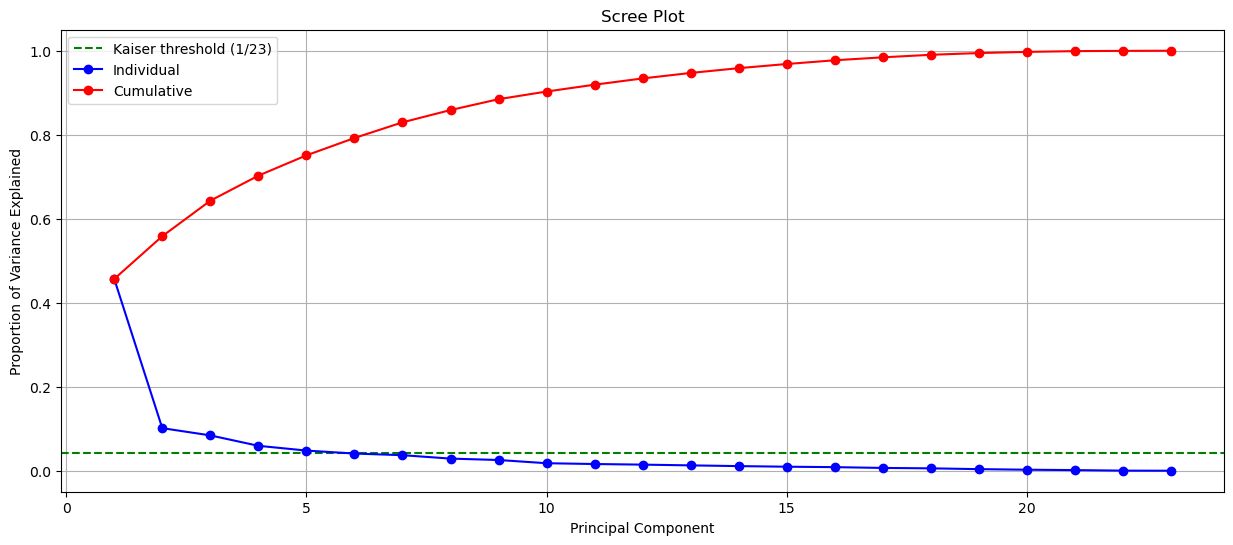

In [41]:
#this code is from HW 8

#import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load and prepare data

X = imputed_df[numeric_cols] #assign to x
X_scaled = StandardScaler().fit_transform(X) #scale

# Perform PCA
U, s, Vt = np.linalg.svd(X_scaled) #SVD
V = Vt.T #transpose 

# Create figure with both scree and biplot


# 1. Scree plot
 #create 1st subplot
var_exp = s**2 / np.sum(s**2) #expained var proportion
cum_var_exp = np.cumsum(var_exp) #explained var total

p = X_scaled.shape[1]               # number of features
kaiser_threshold = 1 / p 

plt.figure(figsize=(15,6))

plt.axhline(y=kaiser_threshold, color='g', linestyle='--',
            label=f'Kaiser threshold (1/{p})')
plt.plot(range(1, len(var_exp) + 1), var_exp, 'bo-', label='Individual') #plot explained var starting at 1
plt.plot(range(1, len(cum_var_exp) + 1), cum_var_exp, 'ro-', label='Cumulative') #plot explained var starting at 1
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.legend()
plt.grid(True)




In [42]:
#code from Chat-GPT version GPT-5
# PCs satisfying the Kaiser criterion (eigenvalue > 1)
kaiser_pcs = np.where(var_exp > kaiser_threshold)[0]  # indices of PCs above threshold

num_kaiser_pcs = len(kaiser_pcs)

print(f"\nNumber of PCs above Kaiser criterion: {num_kaiser_pcs}")

# Print individual variance explained by these PCs
print("\nVariance explained by Kaiser PCs:")
for idx in kaiser_pcs:
    print(f"PC{idx+1}: {var_exp[idx]:.4f} ({var_exp[idx]*100:.2f}%)")

# Print cumulative variance explained
cum_var_kaiser = var_exp[kaiser_pcs].sum()
print(f"\nTotal variance explained by Kaiser PCs: {cum_var_kaiser:.4f} ({cum_var_kaiser*100:.2f}%)")



Number of PCs above Kaiser criterion: 5

Variance explained by Kaiser PCs:
PC1: 0.4568 (45.68%)
PC2: 0.1017 (10.17%)
PC3: 0.0845 (8.45%)
PC4: 0.0597 (5.97%)
PC5: 0.0483 (4.83%)

Total variance explained by Kaiser PCs: 0.7509 (75.09%)


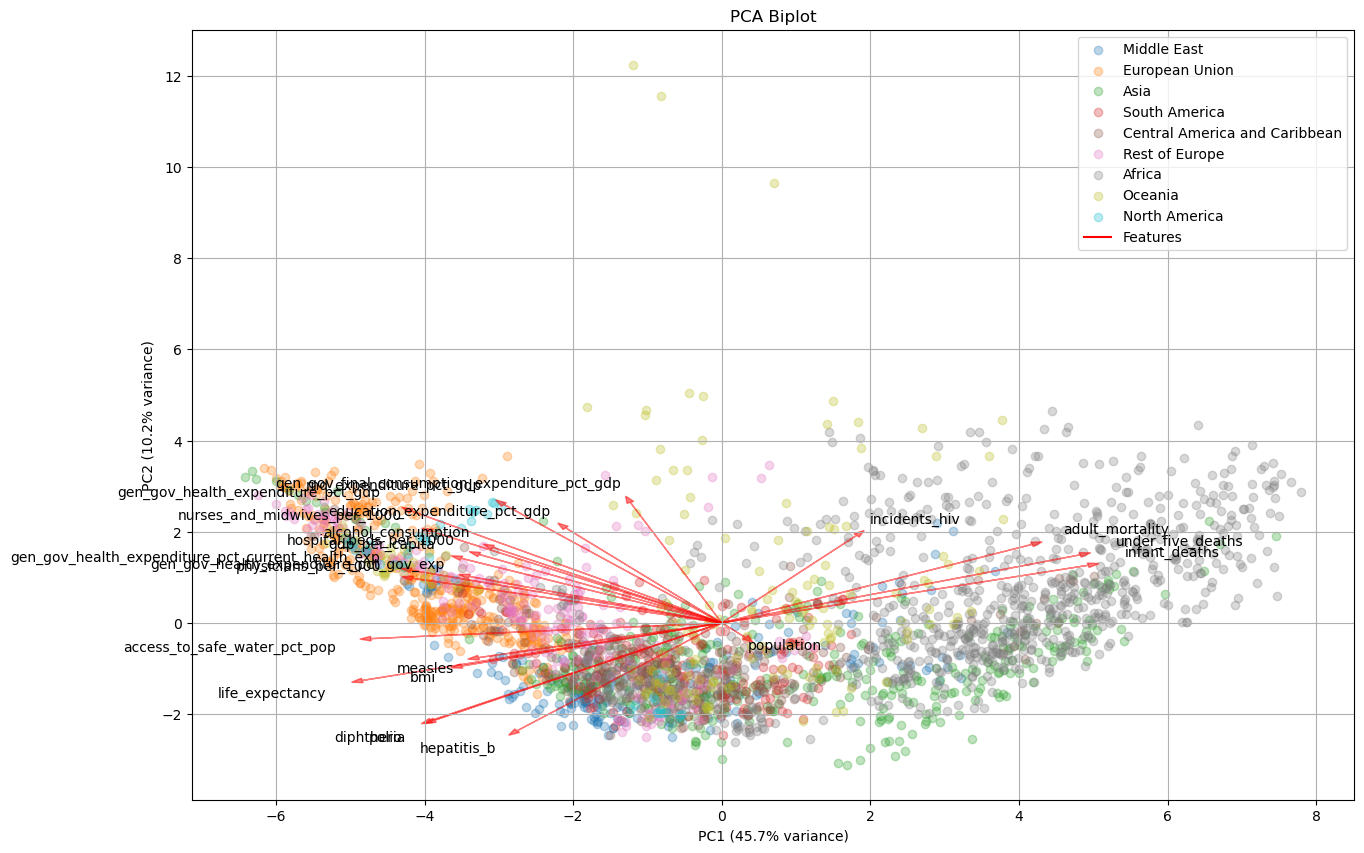

In [43]:
#code is from HW 8
# 2. Biplot
scores = X_scaled @ V #project data
scale = .1  # Adjust this to change relative scaling of arrows

# Plot scores
plt.figure(figsize=(15,10))
regions = imputed_df['region']
unique_regions = regions.unique()

colors = plt.cm.tab10(np.linspace(0, 1, len(unique_regions)))

for reg, col in zip(unique_regions, colors):
    mask = (regions == reg)
    plt.scatter(scores[mask, 0], scores[mask, 1],
                color=col, alpha=0.3, label=reg)

# Plot loadings
for i, feature in enumerate(numeric_cols): #plotting feature loadings
    x = V[i,0] * s[0] * scale #PC1
    y = V[i,1] * s[1] * scale #PC2
    
    plt.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.1) #plot
    
    # Add labels with offset based on quadrant
    if x >= 0:
        ha = 'left'
    else:
        ha = 'right'
    if y >= 0:
        va = 'bottom'
    else:
        va = 'top'
        
    plt.text(x*1.1, y*1.1, feature, ha=ha, va=va)

plt.xlabel(f"PC1 ({var_exp[0]:.1%} variance)") #plot label with variance
plt.ylabel(f"PC2 ({var_exp[1]:.1%} variance)") #plot label with variance
plt.title('PCA Biplot')
plt.grid(True)

# Add legend
plt.plot([0], [0], 'r-', label='Features')
plt.legend()

In [30]:
# Print feature loadings for reference
print("\nFeature loadings (scaled by singular values):") #print loadings for each feature of PC 1 and 2
for name, v1, v2 in zip(numeric_cols, V[:,0] * s[0], V[:,1] * s[1]):
    print(f"{name:25s}: PC1 = {v1:7.4f}, PC2 = {v2:7.4f}")


Feature loadings (scaled by singular values):
infant_deaths            : PC1 = 49.3083, PC2 = 12.6390
under_five_deaths        : PC1 = 48.2160, PC2 = 14.9298
adult_mortality          : PC1 = 41.7352, PC2 = 17.2127
alcohol_consumption      : PC1 = -30.8224, PC2 = 16.5588
hepatitis_b              : PC1 = -27.5475, PC2 = -23.6638
measles                  : PC1 = -32.7368, PC2 = -7.6202
bmi                      : PC1 = -34.9894, PC2 = -9.4559
polio                    : PC1 = -39.1338, PC2 = -21.4126
diphtheria               : PC1 = -38.6624, PC2 = -21.3657
incidents_hiv            : PC1 = 18.1354, PC2 = 19.1918
life_expectancy          : PC1 = -48.3793, PC2 = -12.6292
education_expenditure_pct_gdp: PC1 = -21.0099, PC2 = 20.8371
rnd_expenditure_pct_gdp  : PC1 = -29.3111, PC2 = 25.9687
gdp_per_capita           : PC1 = -35.0376, PC2 = 14.1643
population               : PC1 =  3.1524, PC2 = -3.1860
physicians_per_1000      : PC1 = -41.6193, PC2 =  9.7847
nurses_and_midwives_per_1000: PC1 = -3

## Modeling

### Multiple Linear Regression
Perform multiple linear regression with life expectancy as the target 

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Start from imputed + encoded df
lin_reg_model_df = imputed_encoded_df.copy()

# Drop non-numeric / string columns
lin_reg_model_df = lin_reg_model_df.drop(columns=['country', 'region'], errors='ignore')

# Define X and y
X = lin_reg_model_df.drop(columns='life_expectancy')
y = lin_reg_model_df['life_expectancy']

# Scale predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Fit linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred = lr.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Train R²: {lr.score(X_train, y_train):.3f}")
print(f"Test R²:  {r2:.3f}")
print(f"Test RMSE: {rmse:.3f}")


Train R²: 0.986
Test R²:  0.985
Test RMSE: 1.102


In [32]:

coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr.coef_
})

coef_df = coef_df.sort_values('coefficient', ascending=False)

display(coef_df)


feature  coefficient
12                            rnd_expenditure_pct_gdp     0.550312
18                       access_to_safe_water_pct_pop     0.427458
21             gen_gov_health_expenditure_pct_gov_exp     0.416433
15                                physicians_per_1000     0.331387
13                                     gdp_per_capita     0.313519
25                      Central America and Caribbean     0.284573
31                                      South America     0.200090
8                                               polio     0.170903
4                                 alcohol_consumption     0.161814
19                 gen_gov_health_expenditure_pct_gdp     0.143116
0                                                year     0.127127
22      gen_gov_final_consumption_expenditure_pct_gdp     0.101496
28                                      North America     0.063094
24                                               Asia     0.046970
10                                      incidents_hiv     0.028176
26                                     European Union     0.019090
20  gen_gov_health_expenditure_pct_current_health_exp    -0.006554
6                                             measles    -0.017587
30                                     Rest of Europe    -0.035277
5                                         hepatitis_b    -0.056349
27                                        Middle East    -0.104008
16                       nurses_and_midwives_per_1000    -0.111893
14                                         population    -0.113181
11                      education_expenditure_pct_gdp    -0.140077
7                                                 bmi    -0.144782
23                                             Africa    -0.160686
9                                          diphtheria    -0.194709
17                             hospital_beds_per_1000    -0.237711
29                                            Oceania    -0.246529
1                                       infant_deaths    -0.435159
2                                   under_five_deaths    -3.106643
3                                     adult_mortality    -5.060684

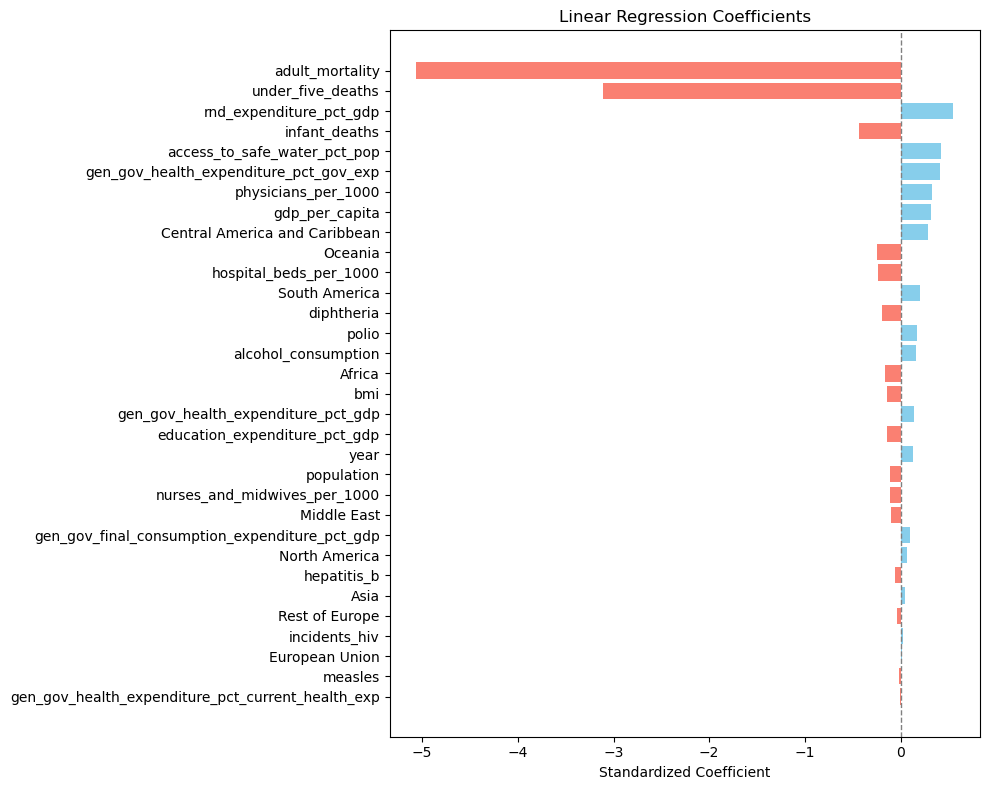

In [33]:
# Build coefficient DataFrame
coefficients = pd.DataFrame({
    "Variable": X.columns,
    "Coefficient": lr.coef_
})

import matplotlib.pyplot as plt
import numpy as np

# Sort by absolute coefficient value for better readability
coefficients_sorted = coefficients.copy()
coefficients_sorted["abs_coef"] = coefficients_sorted["Coefficient"].abs()
coefficients_sorted = coefficients_sorted.sort_values("abs_coef", ascending=True)

# Plot
plt.figure(figsize=(10, 8))
colors = np.where(coefficients_sorted["Coefficient"] > 0, 'skyblue', 'salmon')  # positive = blue, negative = red

plt.barh(coefficients_sorted["Variable"], coefficients_sorted["Coefficient"], color=colors)
plt.axvline(0, color='grey', linestyle='--', linewidth=1)

plt.xlabel("Standardized Coefficient")
plt.title("Linear Regression Coefficients")
plt.tight_layout()
plt.show()


### Ridge Regression (for fun)
- maybe include this in app 

In [ ]:
#this section was generated with the help of chat GPT, version 5, accessed 12/1/25
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

ridge_coef = pd.DataFrame({
    "Variable": X.columns,
    "Coefficient": ridge.coef_
}).sort_values("Coefficient", ascending=False)

ridge_coef


Variable  Coefficient
12                            rnd_expenditure_pct_gdp     0.546781
18                       access_to_safe_water_pct_pop     0.431038
21             gen_gov_health_expenditure_pct_gov_exp     0.413618
15                                physicians_per_1000     0.329227
13                                     gdp_per_capita     0.315729
25                      Central America and Caribbean     0.284930
31                                      South America     0.200782
8                                               polio     0.167334
4                                 alcohol_consumption     0.159544
19                 gen_gov_health_expenditure_pct_gdp     0.148190
0                                                year     0.127348
22      gen_gov_final_consumption_expenditure_pct_gdp     0.102827
28                                      North America     0.062761
24                                               Asia     0.050242
10                                      incidents_hiv     0.019890
26                                     European Union     0.018750
20  gen_gov_health_expenditure_pct_current_health_exp    -0.010470
6                                             measles    -0.016831
30                                     Rest of Europe    -0.036247
5                                         hepatitis_b    -0.058065
27                                        Middle East    -0.103823
16                       nurses_and_midwives_per_1000    -0.111361
14                                         population    -0.112487
11                      education_expenditure_pct_gdp    -0.139379
7                                                 bmi    -0.141212
23                                             Africa    -0.163233
9                                          diphtheria    -0.188206
17                             hospital_beds_per_1000    -0.237863
29                                            Oceania    -0.246201
1                                       infant_deaths    -0.495909
2                                   under_five_deaths    -3.049401
3                                     adult_mortality    -5.044768

### Random Forest

Random Forest R²:  0.996
Random Forest RMSE: 0.550


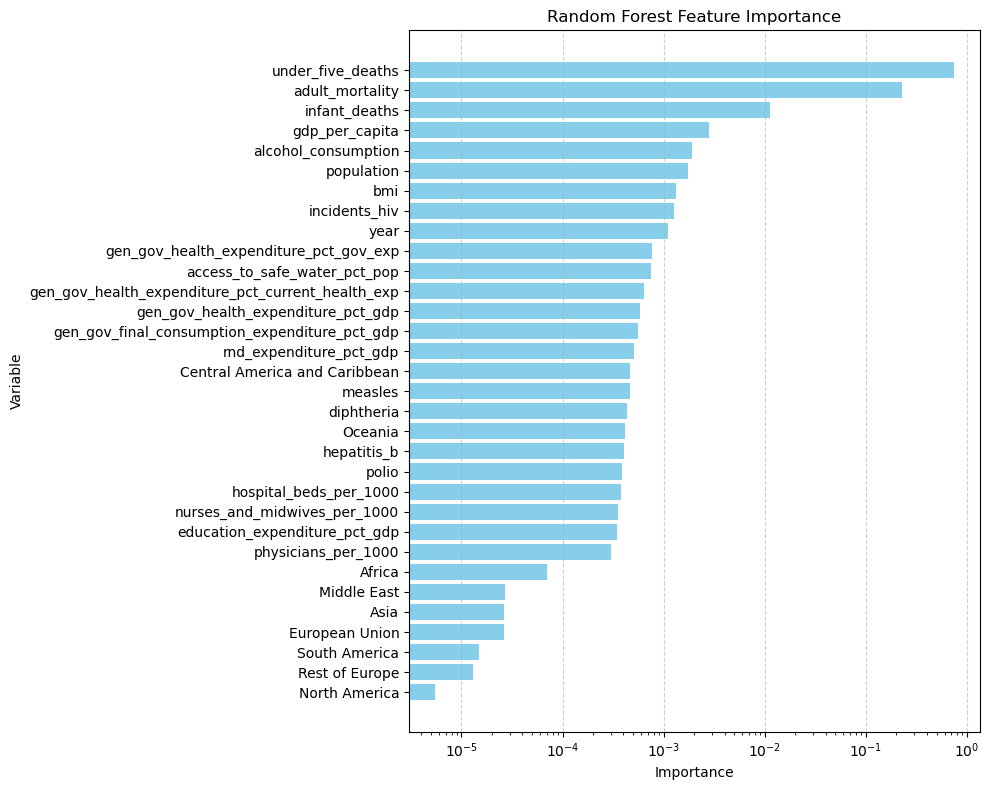

In [ ]:
#this section was generated with the help of chat GPT, version 5, accessed 12/1/25

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Define predictors and target
# Use the imputed + encoded df (regions already one-hot encoded)
rf_df = imputed_encoded_df.copy()

# Drop non-numeric columns if still there
rf_df = rf_df.drop(columns=['country', 'region'], errors='ignore')

X = rf_df.drop(columns=['life_expectancy'])
y = rf_df['life_expectancy']

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Fit Random Forest
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1  # use all cores if allowed
)
rf.fit(X_train, y_train)

# 4. Predictions
y_pred = rf.predict(X_test)

# 5. Evaluate performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Random Forest R²:  {r2:.3f}")
print(f"Random Forest RMSE: {rmse:.3f}")

# 6. Feature importance
importances = pd.DataFrame({
    'Variable': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=True)

# 7. Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(importances['Variable'], importances['Importance'], color='skyblue')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.xscale('log')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6) 
plt.show()


In [36]:
#saving necessary files

merged_df.to_csv("/Users/lukehudak/MSU/FS25/CMSE 830/Final Project/merged_df.csv", index=False)

imputed_df.to_csv("/Users/lukehudak/MSU/FS25/CMSE 830/Final Project/imputed_df.csv", index=False)

imputed_encoded_df.to_csv("/Users/lukehudak/MSU/FS25/CMSE 830/Final Project/imputed_encoded_df.csv", index=False)